# Task 1.2: Optimization of the Model

## Basic Training Script Modification

We decided to incorporate the following well-known enhancements into our training script:

- **Early Stopping:** This allows us to stop training if the model's performance on a validation dataset stops improving.
```python
# Early stopping callback
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
```

- **Reduce on Plateau:** This dynamically adjusts the learning rate if the validation loss stops decreasing.
```python
# Dynamic learning rate scheduling callback
lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.1, patience=3, min_lr=1e-6)
```

- **decrease the initial learning rate**: we observed significant fluctuations in the loss during training (jumping across a hole).

- **decrease the number of epochs**: Even by reducing the learing rate, the amount of epoch used was too large, there is not even need to reach early stopping, we can by understand the good amount of epoch by monitoring the loss. (by experience)

- **minimal architectural changes**: We added batch normalization and dropout layers.
```python
# Dynamic learning rate scheduling callback
METTI BATCH NORM
```
- **Increase BATCH_SIZE to 128**

This adjustment led to higher accuracy on the provided `the_wildfire_dataset_2n_version`. However, this accuracy did not translate well to the 20 images of the hidden dataset. We didn't spend time in further architectural changes since the restriction in the backbone rules wouldn't allow us to get significative improvement, instead we took a different path: Upon visual inspection, we found that the two distributions were significantly different. Specifically, the color distributions and sensitivity to smoke appeared distinct. As a result, the model only achieved 60% accuracy.

To address this issue, we sought out images more similar to the 20 images in the secret testing dataset. **We collected 80 such images**, which can be found [here](https://drive.google.com/file/d/1PFWUfYg8KWWZo1Ct6BOaCtkI5-mJ5Hwe/view?usp=share_link). Our strategy involved fine-tuning the model with this new dataset and retesting the accuracy on the 20 images. We found an accuracy of 95%. However, it's important to note that this second validation is biased, as we used the images to find similar ones. Nevertheless, the variance between images seems small, so we hope the score will be similar on the other images from the same dataset.


In [ ]:
# get your kaggle json file and download dataset
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maulei","key":"695720bab11e8b06c895eff1d799ad79"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d elmadafri/the-wildfire-dataset

100% 9.93G/9.94G [01:24<00:00, 61.5MB/s]
100% 9.94G/9.94G [01:24<00:00, 126MB/s] 


In [4]:
!unzip the-wildfire-dataset.zip

Archive:  the-wildfire-dataset.zip
  inflating: the_wildfire_dataset_2n_version/test/fire/19196558588_267f24b847_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/20960888741_8c4be2c1df_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26131736898_9e6a8cd68f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/26549039025_b4cce14ec7_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27002088114_aa5cc7f353_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27335331950_39b376eddd_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27389369514_cd30397ac2_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27951228213_2dd961ac1f_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/27968020506_5f1a59f2a5_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28020330864_d7a2429a7e_o.jpg  
  inflating: the_wildfire_dataset_2n_version/test/fire/28347651877_ce21ed134e_o.png  
  inflating: the_wi

In [98]:
!rm -rf /content/augmentedData

In [5]:
# Manually load dataset and unzip them
!unzip -o augmentedData.zip
#!unzip valData.zip

Archive:  augmentedData.zip
   creating: augmentedData/
  inflating: augmentedData/.DS_Store  
  inflating: __MACOSX/augmentedData/._.DS_Store  
   creating: augmentedData/train/
  inflating: augmentedData/train/.DS_Store  
  inflating: __MACOSX/augmentedData/train/._.DS_Store  
   creating: augmentedData/train/fire/
   creating: augmentedData/train/nofire/
  inflating: augmentedData/train/fire/47.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._47.jpeg  
  inflating: augmentedData/train/fire/10.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._10.jpeg  
  inflating: augmentedData/train/fire/51.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._51.jpeg  
  inflating: augmentedData/train/fire/26.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._26.jpeg  
  inflating: augmentedData/train/fire/67.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._67.jpeg  
  inflating: augmentedData/train/fire/30.jpeg  
  inflating: __MACOSX/augmentedData/train/fire/._30.jpeg 

In [6]:
!unzip valData.zip

Archive:  valData.zip
   creating: valData/
  inflating: valData/.DS_Store       
  inflating: __MACOSX/valData/._.DS_Store  
   creating: valData/test/
  inflating: valData/test/.DS_Store  
  inflating: __MACOSX/valData/test/._.DS_Store  
   creating: valData/test/fire/
  inflating: __MACOSX/valData/test/._fire  
   creating: valData/test/nofire/
  inflating: __MACOSX/valData/test/._nofire  
  inflating: valData/test/fire/52334093933_07479705b4_o.jpg  
  inflating: __MACOSX/valData/test/fire/._52334093933_07479705b4_o.jpg  
  inflating: valData/test/fire/52333856041_2ecd6fac7c_o.jpg  
  inflating: __MACOSX/valData/test/fire/._52333856041_2ecd6fac7c_o.jpg  
  inflating: valData/test/fire/52334291005_ebfa94a6fa_o.jpg  
  inflating: __MACOSX/valData/test/fire/._52334291005_ebfa94a6fa_o.jpg  
  inflating: valData/test/fire/52328570849_3e1f5ec052_o.jpg  
  inflating: __MACOSX/valData/test/fire/._52328570849_3e1f5ec052_o.jpg  
  inflating: valData/test/fire/52332905427_27e28f5061_o.jpg  
  

## Setting Up Data Loaders

Before we can start training our model, we need to load our image data into a format that's usable by TensorFlow. This is done by using the `tf.keras.utils.image_dataset_from_directory` function, which conveniently handles images stored in a directory structure.

Here's what we are setting up in this cell:

1. **Directory Paths**: We define the base directory where our dataset is located. Within this base directory, we should have three subdirectories corresponding to our training, validation, and test sets, respectively.

2. **Image Loading Parameters**: We set the batch size and image size. The batch size is the number of images that the model will process at one time during training, and the image size is the dimensions to which all images will be resized.

3. **Data Loaders**: We create data loaders for the training, validation, and test datasets. These loaders will read the images from disk, apply the specified preprocessing, and arrange them into batches.

Note: The `label_mode` is set to 'binary' which indicates that our problem is a binary classification task. If you have more than two classes, change this parameter to 'categorical'.

The `shuffle` parameter is set to `True` for the training dataset to ensure that the model does not learn anything from the order of the images. It's not necessary to shuffle the validation and test sets, but doing so does not harm and ensures that any evaluation of the model is done on a random sample of the data.

After running this cell, `train_dataset`, `val_dataset`, and `test_dataset` will be ready for use in the model training and evaluation steps.

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models

# Define directory paths and constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 128
learning_rate_initial = 0.01

# Define the directory paths for the training, validation, and test sets
base_dir = '/content/the_wildfire_dataset_2n_version'
base_dir2 = '/content/augmentedData'
base_dir3 = '/content/valData'
train_dir = os.path.join(base_dir, 'train')
train_dir2 = os.path.join(base_dir2, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
test_dir2 = os.path.join(base_dir3, 'test')
# Load the datasets using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

train_dataset2 = tf.keras.utils.image_dataset_from_directory(
    train_dir2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)
test_dataset2 = tf.keras.utils.image_dataset_from_directory(
    test_dir2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'
)
class_names = train_dataset.class_names
label_map = {class_names.index('fire'): 1, class_names.index('nofire'): 0}

# Define a function to remap the labels
def remap_labels(image, label):
    return image, tf.where(label == 0, 1, 0)  # this will swap 0s and 1s

# Use the `map` function to apply the remap_labels function
train_dataset = train_dataset.map(remap_labels)
train_dataset2 = train_dataset2.map(remap_labels)

val_dataset = val_dataset.map(remap_labels)
test_dataset = test_dataset.map(remap_labels)
test_dataset2 = test_dataset2.map(remap_labels)

Found 1887 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Found 402 files belonging to 2 classes.
Found 410 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


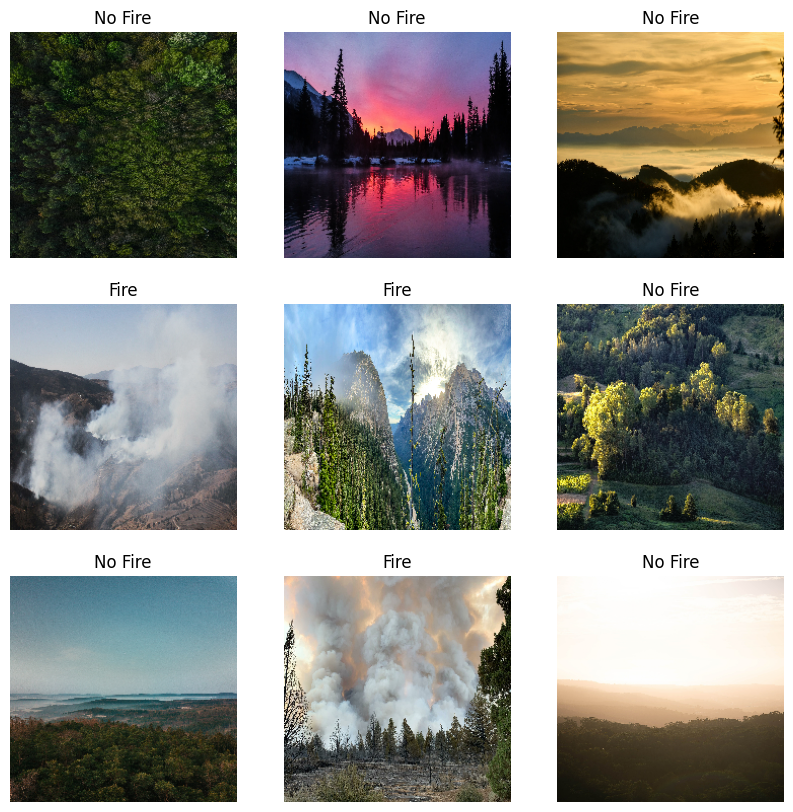

In [10]:
## THE TRAINING BIG DATASET
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(min(len(image_batch), 9)):  # Display up to 9 images from the batch
        ax = plt.subplot(3, 3, n+1)
        plt.imshow(image_batch[n] / 255.0)  # Make sure the pixel values are in [0,1] range
        if label_batch[n]:
            plt.title("Fire")
        else:
            plt.title("No Fire")
        plt.axis("off")

image_batch, label_batch = next(iter(train_dataset))
show_batch(image_batch, label_batch)


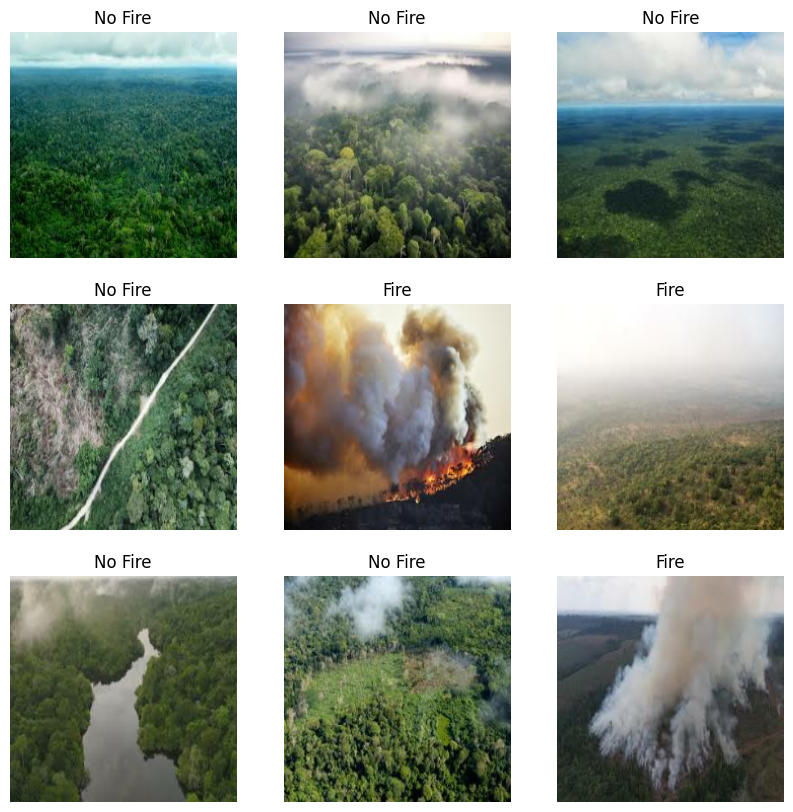

In [11]:
## OUR TRAINING DATASET
image_batch, label_batch = next(iter(train_dataset2))
show_batch(image_batch, label_batch)

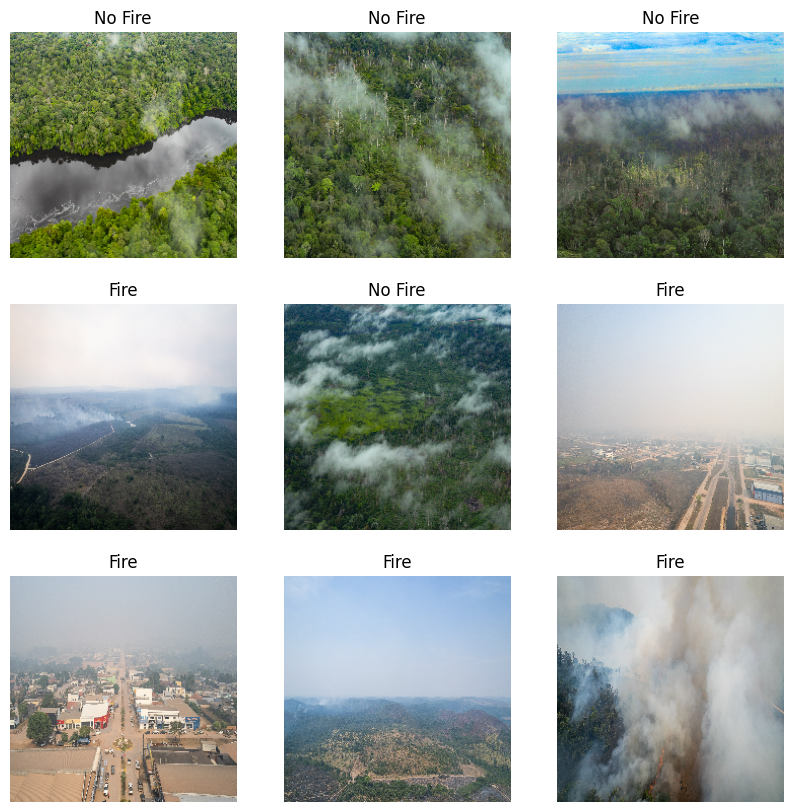

In [12]:
## THE HIDDEN DATASET DATA
image_batch, label_batch = next(iter(test_dataset2))
show_batch(image_batch, label_batch)

## Optimizing Data Loading

In this cell, we optimize the data loading process for our training, validation, and test datasets. `AUTOTUNE` is a TensorFlow feature that allows the dataset to dynamically adjust the number of images it processes simultaneously, based on the current system conditions.

By calling the `prefetch` method with `buffer_size=AUTOTUNE`, we enable the input pipeline to fetch batches in the background while the model is training. This helps in reducing the time the model has to wait for the data and can improve overall training speed.

Prefetching is a best practice that can significantly improve computational efficiency.

In [2]:
# Configure the datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

## Setting Up the Base Model with EfficientNetB0

As required, we use the EfficientNetB0 architecture.


In [ ]:
# Define the model
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True  # Fine-tune the base model

## Train model

We fully retrain the model since it yields higher accuracy.

In [ ]:
# DONT FREEZE
# Freeze all the layers before the `fine_tune_at` layer
# fine_tune_at = 1
# for layer in base_model.layers[:fine_tune_at]:
#     layer.trainable = False

## Incorporating a Global Average Pooling Layer

We added BatchNormalization and a Dropout layer.


In [ ]:
from tensorflow.keras import layers, models, callbacks


# Define the data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
])


# Define the model with data augmentation
inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Apply data augmentation to the inputs
x = data_augmentation(inputs)

x = base_model(x, training=True)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x= layers.BatchNormalization()(x)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # Use 'sigmoid' for binary classification

## Building the Complete Model

With all the components ready, we now assemble the complete model. This model incorporates preprocessing, the pre-trained base model for feature extraction, pooling to condense the features, and a prediction layer for output. Additionally, we include a Dropout layer to reduce overfitting by randomly setting input units to 0 at a rate of 0.2 during training.

In [ ]:
# Build the model
model = models.Model(inputs, outputs)

## Compiling the Model

With our model architecture defined, the next step is to compile the model. Compiling the model prepares it for training by specifying the loss function, optimizer, and metrics to use for evaluation.


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_initial/100),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Training the Model

Now that our model is compiled, we're ready to start the training process. Training the model involves feeding it our training dataset and letting it learn to predict the correct labels. During training, the model will also be validated using a separate dataset to monitor its performance on data it has not seen before.



In [ ]:
# Early stopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# Dynamic learning rate scheduling callback
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=1e-6
)

In [ ]:
from tensorflow.keras.callbacks import Callback

class NBatchLogger(Callback):
    """
    A Logger that logs average performance per `display` steps.
    """
    def __init__(self, display, train_data, val_data):
        super(NBatchLogger, self).__init__()
        self.step = 0
        self.display = display
        self.train_data = train_data
        self.val_data = val_data

    def on_batch_end(self, batch, logs={}):
        self.step += 1
        if self.step % self.display == 0:
            val_loss, val_accuracy = self.model.evaluate(self.val_data, verbose=0)
            print(f'Step {self.step}/{self.params["steps"]} ... '
                  f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

# Instantiate the NBatchLogger callback
n_batch_logger = NBatchLogger(display=10,train_data = train_dataset,val_data = val_dataset)  # Adjust display frequency as needed

# Fit the model with callbacks including NBatchLogger
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=[early_stopping, lr_scheduler]  # Optionally include NBatchLogger here
)


Epoch 1/5
15/15 [==============================] - 433s 13s/step - loss: 0.6458 - accuracy: 0.6783 - val_loss: 0.5599 - val_accuracy: 0.7438 - lr: 1.0000e-04
Epoch 2/5
15/15 [==============================] - 415s 15s/step - loss: 0.4135 - accuracy: 0.8076 - val_loss: 0.4911 - val_accuracy: 0.7935 - lr: 1.0000e-04
Epoch 3/5
15/15 [==============================] - 494s 22s/step - loss: 0.3172 - accuracy: 0.8484 - val_loss: 0.4214 - val_accuracy: 0.8483 - lr: 1.0000e-04
Epoch 4/5
15/15 [==============================] - 411s 14s/step - loss: 0.2755 - accuracy: 0.8834 - val_loss: 0.3864 - val_accuracy: 0.8483 - lr: 1.0000e-04
Epoch 5/5
15/15 [==============================] - 406s 15s/step - loss: 0.2352 - accuracy: 0.9057 - val_loss: 0.3571 - val_accuracy: 0.8483 - lr: 1.0000e-04


In [ ]:
# Let's do some more epoch and look if it gets better
history2 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    callbacks=[early_stopping, lr_scheduler]  # Optionally include NBatchLogger here
)


Epoch 1/5
15/15 [==============================] - 404s 15s/step - loss: 0.1943 - accuracy: 0.9242 - val_loss: 0.3193 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 2/5
15/15 [==============================] - 405s 15s/step - loss: 0.1646 - accuracy: 0.9380 - val_loss: 0.3016 - val_accuracy: 0.8756 - lr: 1.0000e-04
Epoch 3/5
15/15 [==============================] - 416s 15s/step - loss: 0.1506 - accuracy: 0.9401 - val_loss: 0.2947 - val_accuracy: 0.8930 - lr: 1.0000e-04
Epoch 4/5
15/15 [==============================] - 415s 15s/step - loss: 0.1321 - accuracy: 0.9539 - val_loss: 0.2780 - val_accuracy: 0.9005 - lr: 1.0000e-04
Epoch 5/5
15/15 [==============================] - 446s 16s/step - loss: 0.1266 - accuracy: 0.9565 - val_loss: 0.2531 - val_accuracy: 0.9179 - lr: 1.0000e-04


In [ ]:
# Save model current status
import tensorflow as tf

# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'before_fintuning.h5'
save_path = f'{model_name}'

# Save your model
model.save(save_path)
print(f'Model saved to {save_path}')

In [ ]:
# Let's do some more epoch by chance: we start overfitting
history3 = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3,
    callbacks=[early_stopping, lr_scheduler]  # Optionally include NBatchLogger here
)


Epoch 1/3
15/15 [==============================] - 432s 16s/step - loss: 0.1023 - accuracy: 0.9682 - val_loss: 0.2691 - val_accuracy: 0.9030 - lr: 1.0000e-04
Epoch 2/3
15/15 [==============================] - 420s 15s/step - loss: 0.0926 - accuracy: 0.9629 - val_loss: 0.2744 - val_accuracy: 0.8980 - lr: 1.0000e-04
Epoch 3/3
 8/15 [===============>..............] - ETA: 2:11 - loss: 0.0711 - accuracy: 0.9795

ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/model_3/efficientnetb0/block2a_expand_bn/FusedBatchNormGradV3 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-65-e9723b446e13>", line 25, in <cell line: 25>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

OOM when allocating tensor with shape[128,96,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_3/efficientnetb0/block2a_expand_bn/FusedBatchNormGradV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_152262]

## Let's plot lerning curves

In [ ]:
history.history

{'loss': [0.6457797884941101,
  0.4134554862976074,
  0.31722626090049744,
  0.275481641292572,
  0.23523156344890594],
 'accuracy': [0.678325355052948,
  0.8076311349868774,
  0.8484366536140442,
  0.8834128379821777,
  0.9056704044342041],
 'val_loss': [0.5599261522293091,
  0.49107351899147034,
  0.42138364911079407,
  0.38637539744377136,
  0.357050359249115],
 'val_accuracy': [0.7437810897827148,
  0.7935323119163513,
  0.8482587337493896,
  0.8482587337493896,
  0.8482587337493896],
 'lr': [1e-04, 1e-04, 1e-04, 1e-04, 1e-04]}

In [ ]:
history2.history

{'loss': [0.19430293142795563,
  0.1646137833595276,
  0.150614932179451,
  0.1320558488368988,
  0.12662538886070251],
 'accuracy': [0.9242183566093445,
  0.9379968047142029,
  0.9401165843009949,
  0.953895092010498,
  0.9565447568893433],
 'val_loss': [0.3193151652812958,
  0.30164679884910583,
  0.29466602206230164,
  0.27799415588378906,
  0.25305598974227905],
 'val_accuracy': [0.8756219148635864,
  0.8756219148635864,
  0.893034815788269,
  0.9004974961280823,
  0.9179104566574097],
 'lr': [1e-04, 1e-04, 1e-04, 1e-04, 1e-04]}

In [ ]:
history3 = {'loss': [0.1023,
  0.0926],
 'accuracy': [0.9682,
  0.9629],
 'val_loss': [0.2691,
  0.2744],
 'val_accuracy': [0.9030,
  0.8980],
 'lr': [1e-04, 1e-04]}

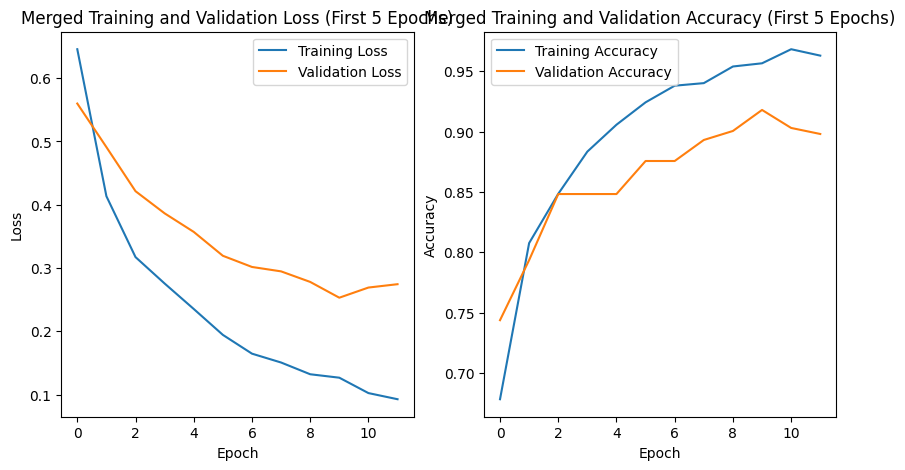

In [ ]:
merged_history = {}

# Merge training and validation metrics for the first 5 epochs
merged_history['loss'] = history.history['loss'][:5] + history2.history['loss'][:5] + history3['loss']
merged_history['accuracy'] = history.history['accuracy'][:5] + history2.history['accuracy'][:5] + history3['accuracy']
merged_history['val_loss'] = history.history['val_loss'][:5] + history2.history['val_loss'][:5] + history3['val_loss']
merged_history['val_accuracy'] = history.history['val_accuracy'][:5] + history2.history['val_accuracy'][:5] + history3['val_accuracy']

# Plot merged training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(merged_history['loss'], label='Training Loss')
plt.plot(merged_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (First 5 Epochs)')
plt.legend()

# Plot merged training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(merged_history['accuracy'], label='Training Accuracy')
plt.plot(merged_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (First 5 Epochs)')
plt.legend()

plt.show()

In [3]:
# reload the best model
# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'before_fintuning.h5'
save_path = f'{model_name}'

# Load the model
model = tf.keras.models.load_model(save_path)

In [4]:
# Test accuracy on the 20 images subset
# Evaluate the model on the dataset
accuracy = model.evaluate(test_dataset)

print(f'Accuracy on the original test set: {accuracy[1]}')

accuracy = model.evaluate(test_dataset2)

print(f'Accuracy on the 20 images: {accuracy[1]}')

4/4 [==============================] - 76s 102ms/step - loss: 0.2013 - accuracy: 0.9171
Accuracy on the original test set: 0.9170731902122498
1/1 [==============================] - 0s 358ms/step - loss: 1.0111 - accuracy: 0.5000
Accuracy on the 20 images: 0.5


# THE ACCURACY ON THE 20 IMAGES IS TERRIBLE
Let's fix it by training on our dataset. Since the images are few we simply train the last 10 layers

In [5]:
# Freeze layers and

# Freeze the layers except for the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

# fine tune on the 80 similar images

# Fit the model without validation data
history = model.fit(
    train_dataset2,
    validation_data=test_dataset2,
    epochs=2
)

Epoch 1/2
2/2 [==============================] - 35s 2s/step - loss: 0.5089 - accuracy: 0.8286 - val_loss: 0.9331 - val_accuracy: 0.5000
Epoch 2/2
2/2 [==============================] - 2s 1s/step - loss: 0.4984 - accuracy: 0.8286 - val_loss: 0.8034 - val_accuracy: 0.6500


In [6]:
accuracy = model.evaluate(test_dataset)

print(f'Accuracy on the original test set: {accuracy[1]}')

accuracy = model.evaluate(test_dataset2)

print(f'Accuracy on the 20 images: {accuracy[1]}')


4/4 [==============================] - 78s 91ms/step - loss: 0.1849 - accuracy: 0.9268
Accuracy on the original test set: 0.9268292784690857
1/1 [==============================] - 0s 319ms/step - loss: 0.8145 - accuracy: 0.6500
Accuracy on the 20 images: 0.6499999761581421


## We are happy with this results
We will simply reload the model and train it also on the 20 images.

In [18]:
# reload the best model
# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'before_fintuning.h5'
save_path = f'{model_name}'

# Load the model
model = tf.keras.models.load_model(save_path)

In [11]:
# Move the valData in the augmentedData folder,
# then train again, Finally save the model and hope for the best
!mv /content/valData/test/fire/* /content/augmentedData/train/fire/
!mv /content/valData/test/nofire/* /content/augmentedData/train/nofire/

In [19]:
# Redefine train_dataset2
train_dataset2 = tf.keras.utils.image_dataset_from_directory(
    train_dir2,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    label_mode='binary'  # Use 'binary' because there are only two classes
)
train_dataset2 = train_dataset2.map(remap_labels)

Found 160 files belonging to 2 classes.


In [20]:
# Freeze layers and

# Freeze the layers except for the last 10 layers
for layer in model.layers[:-10]:
    layer.trainable = False

# fine tune on the 80 similar images

# Fit the model without validation data
history = model.fit(
    train_dataset2,
    epochs=2
)

Epoch 1/2
2/2 [==============================] - 28s 120ms/step - loss: 0.6261 - accuracy: 0.7937
Epoch 2/2
2/2 [==============================] - 1s 113ms/step - loss: 0.5555 - accuracy: 0.8062


In [22]:
# Save model current status
import tensorflow as tf

# Replace 'my_model' with your model's name and choose an appropriate path in your Google Drive
model_name = 'finalModel.keras'
save_path = f'{model_name}'

# Save your model
model.save(save_path)
print(f'Model saved to {save_path}')

Model saved to finalModel.keras
